In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("StudentsPerformance.csv")
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,984.00000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.48374,1.855691,2.675813,0.347561,0.362805,66.775407,69.795732,68.718496
std,0.49999,1.368706,1.685189,0.476438,0.481054,14.243035,13.831126,14.356492
min,0.00000,0.000000,0.000000,0.000000,0.000000,29.000000,31.000000,33.000000
25%,0.00000,1.000000,1.000000,0.000000,0.000000,57.000000,60.000000,58.000000
50%,0.00000,1.000000,3.000000,0.000000,0.000000,67.000000,70.000000,69.000000
75%,1.00000,3.000000,4.000000,1.000000,1.000000,77.000000,80.000000,79.000000
max,1.00000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000


- No null values are present in the dataset

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
data_col = data.columns
for i in data_col[:len(data_col)-3]:
    print("Unique data elements for "+str(i)+" : "+str(data[i].unique()))

Unique data elements for gender : ['female' 'male']
Unique data elements for race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Unique data elements for parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique data elements for lunch : ['standard' 'free/reduced']
Unique data elements for test preparation course : ['none' 'completed']


In [11]:
df = data.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### filling missing values

In [13]:
mean_math_score = df['math score'].mean()
df['math score'].fillna(mean_math_score, inplace = True)

In [14]:
mean_reading_score = df['reading score'].mean()
df['reading score'].fillna(mean_reading_score, inplace = True)

In [ ]:
mean_writing_score = df['writing score'].mean()
df['writing score'].fillna(mean_writing_score, inplace = True)

### Catogorical data into numeric data

In [16]:
cat_cols = df.select_dtypes(['object']).columns

# output of factorize() is [labels, uniques] and we need labels.
df[cat_cols] = df[cat_cols].apply(lambda x:pd.factorize(x)[0]) 

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,0,0,0,72,72,74
1,0,1,1,0,1,69,90,88
2,0,0,2,0,0,90,95,93
3,1,2,3,1,0,47,57,44
4,1,1,1,0,0,76,78,75


### Check for outliers 

<AxesSubplot:xlabel='math score'>

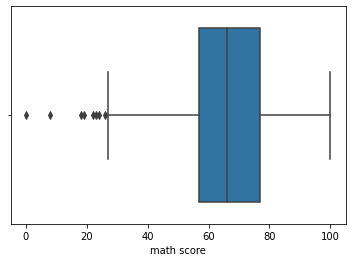

In [18]:
import seaborn as sns
sns.boxplot(x=df['math score'])

<AxesSubplot:xlabel='reading score'>

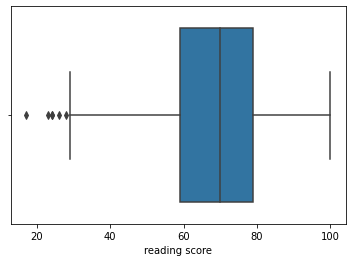

In [19]:
import seaborn as sns
sns.boxplot(x=df['reading score'])

<AxesSubplot:xlabel='writing score'>

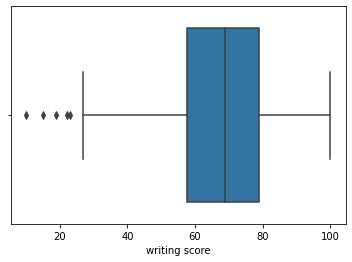

In [20]:
import seaborn as sns
sns.boxplot(x=df['writing score'])

In [25]:
def outlierDetection (i,df):
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(df[i] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[i] <= (Q1-1.5*IQR))

    ''' Removing the Outliers '''
    df.drop(upper[0], axis=0, inplace = True)
    df.drop(lower[0], axis=0, inplace = True)

In [26]:
outlierDetection('math score',df)
df = df.reset_index(drop=True)

<AxesSubplot:xlabel='math score'>

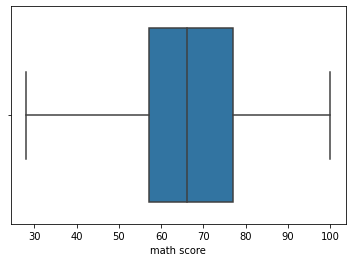

In [27]:
sns.boxplot(x=df['math score'])

In [28]:
outlierDetection('reading score', df)
df = df.reset_index(drop=True)

<AxesSubplot:xlabel='reading score'>

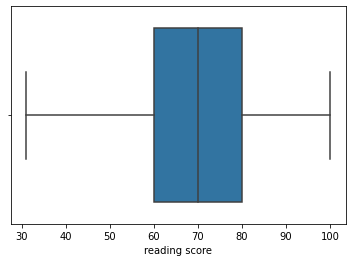

In [31]:
sns.boxplot(x=df['reading score'])

In [32]:
outlierDetection('writing score', df)
df = df.reset_index(drop=True)

<AxesSubplot:xlabel='writing score'>

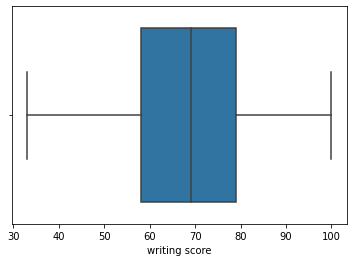

In [33]:
sns.boxplot(x=df['writing score'])

- Reomoved outliers using boxplot

## Using MinMaxScaler to scale data from range 0 to 10

In [21]:
df_scaled = df.copy()

In [22]:
col_names = ['math score', 'reading score', 'writing score']

features= df_scaled[col_names]

In [23]:
from sklearn.preprocessing import MinMaxScaler
# scaled = (x-min)/(max-min)

scaler = MinMaxScaler(feature_range=(0,10))
df_scaled[col_names] = scaler.fit_transform(features.values)

In [24]:
df_scaled.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,0,0,0,7.2,6.626506,7.111111
1,0,1,1,0,1,6.9,8.795181,8.666667
2,0,0,2,0,0,9.0,9.397590,9.222222
3,1,2,3,1,0,4.7,4.819277,3.777778
4,1,1,1,0,0,7.6,7.349398,7.222222


- Data is scaled in 0 - 10

In [40]:
from sklearn import preprocessing
df1 = df

In [41]:
Standardisation = preprocessing.StandardScaler()

In [43]:
x_after_Standardisation = Standardisation.fit_transform(df1)

Standardisation = (x - mean(x)) / standard_deviation

In [44]:
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-0.96799167 -1.3564894  -1.58864892 ...  0.36700396  0.15945117
   0.3680697 ]
 [-0.96799167 -0.62550059 -0.99494192 ...  0.15626759  1.46152545
   1.34373415]
 [-0.96799167 -1.3564894  -0.40123492 ...  1.63142218  1.82321276
   1.69218573]
 ...
 [-0.96799167 -0.62550059  0.78617909 ... -0.54618698  0.08711371
  -0.25914316]
 [-0.96799167  0.83647703 -0.99494192 ...  0.08602213  0.59347593
   0.57714065]
 [-0.96799167  0.83647703 -0.99494192 ...  0.71823124  1.17217561
   1.20435351]]
